In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df=pd.read_csv("EWR_AA.csv")

In [3]:
df

,Carrier Code,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,01/01/2017,PHX,16:30,16:28,-2.0,0.0,0.0,0.0,0.0,0.0
1,AA,01/01/2017,MIA,08:00,07:55,-5.0,0.0,0.0,0.0,0.0,0.0
2,AA,01/01/2017,MIA,17:42,17:39,-3.0,0.0,0.0,0.0,0.0,0.0
3,AA,01/01/2017,PHX,13:10,13:04,-6.0,0.0,0.0,15.0,0.0,0.0
4,AA,01/01/2017,CLT,15:20,15:16,-4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20689,AA,12/31/2018,CLT,05:00,05:02,2.0,0.0,0.0,0.0,0.0,0.0
20690,AA,12/31/2018,PHX,09:59,09:57,-2.0,0.0,0.0,0.0,0.0,0.0
20691,AA,12/31/2018,ORD,07:01,06:56,-5.0,0.0,0.0,0.0,0.0,0.0
20692,AA,12/31/2018,CLT,13:09,13:07,-2.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df1=df.groupby(['Date (MM/DD/YYYY)'],as_index=False).sum()

In [5]:
df1.head(100)

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,01/01/2017,312.0,252.0,0.0,15.0,0.0,0.0
1,01/01/2018,754.0,472.0,0.0,0.0,0.0,111.0
2,01/01/2019,80.0,41.0,0.0,147.0,0.0,105.0
3,01/02/2017,176.0,147.0,0.0,105.0,0.0,102.0
4,01/02/2018,718.0,2.0,0.0,21.0,0.0,617.0
...,...,...,...,...,...,...,...
95,02/01/2019,761.0,413.0,0.0,0.0,0.0,368.0
96,02/02/2017,-4.0,1.0,0.0,61.0,2.0,8.0
97,02/02/2018,201.0,90.0,0.0,112.0,0.0,168.0
98,02/02/2019,-65.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df1['Date'] = pd.to_datetime(df1['Date (MM/DD/YYYY)'])

In [7]:
df1=df1.drop(['Date (MM/DD/YYYY)'],axis=1)

In [8]:
df2=df1.sort_values(by=['Date'],ascending=False)

In [9]:
df2

,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
818,126.0,142.0,0.0,35.0,0.0,18.0,2019-09-30
815,-62.0,0.0,0.0,112.0,0.0,10.0,2019-09-29
812,17.0,34.0,0.0,2.0,0.0,19.0,2019-09-28
809,152.0,0.0,0.0,203.0,0.0,55.0,2019-09-27
806,493.0,405.0,0.0,69.0,0.0,35.0,2019-09-26
...,...,...,...,...,...,...,...
12,172.0,65.0,0.0,90.0,0.0,57.0,2017-01-05
9,320.0,146.0,0.0,28.0,0.0,165.0,2017-01-04
6,408.0,116.0,1.0,30.0,0.0,224.0,2017-01-03
3,176.0,147.0,0.0,105.0,0.0,102.0,2017-01-02


In [10]:
df2['Half year']=pd.qcut(df2['Date'],q=12)

In [11]:
df3=df2.groupby('Half year')

In [12]:
df4=df3[['Departure delay (Minutes)','Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)']].sum()

In [13]:
df4.sort_values(by=['Departure delay (Minutes)'],ascending=False)

,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
Half year,,,,,,
"(2018-05-17, 2018-08-08 12:00:00]",28005.0,6031.0,1439.0,6684.0,8.0,17601.0
"(2019-07-08 12:00:00, 2019-09-30]",27536.0,5768.0,1607.0,9355.0,90.0,17492.0
"(2019-04-16, 2019-07-08 12:00:00]",26296.0,3960.0,2476.0,9340.0,0.0,18361.0
"(2017-06-17, 2017-09-08 12:00:00]",20634.0,4958.0,1891.0,8587.0,46.0,11861.0
"(2017-03-25 12:00:00, 2017-06-17]",20216.0,4829.0,153.0,6761.0,11.0,14327.0
"(2018-02-22 12:00:00, 2018-05-17]",17333.0,4816.0,1698.0,4425.0,0.0,10630.0
"(2016-12-31 23:59:59.999999999, 2017-03-25 12:00:00]",16594.0,5728.0,879.0,3432.0,2.0,8766.0
"(2019-01-22 12:00:00, 2019-04-16]",14766.0,6313.0,913.0,6611.0,41.0,9032.0
"(2018-08-08 12:00:00, 2018-10-31]",12833.0,3549.0,1319.0,5796.0,0.0,9994.0


In [14]:
y_axis=[]

In [15]:
a=df1['Delay Carrier (Minutes)'].sum()
b=df1['Delay Weather (Minutes)'].sum()
c=df1['Delay National Aviation System (Minutes)'].sum()
d=df1['Delay Security (Minutes)'].sum()
e=df1['Delay Late Aircraft Arrival (Minutes)'].sum()
x_axis=['Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)']
y_axis=[a,b,c,d,e]

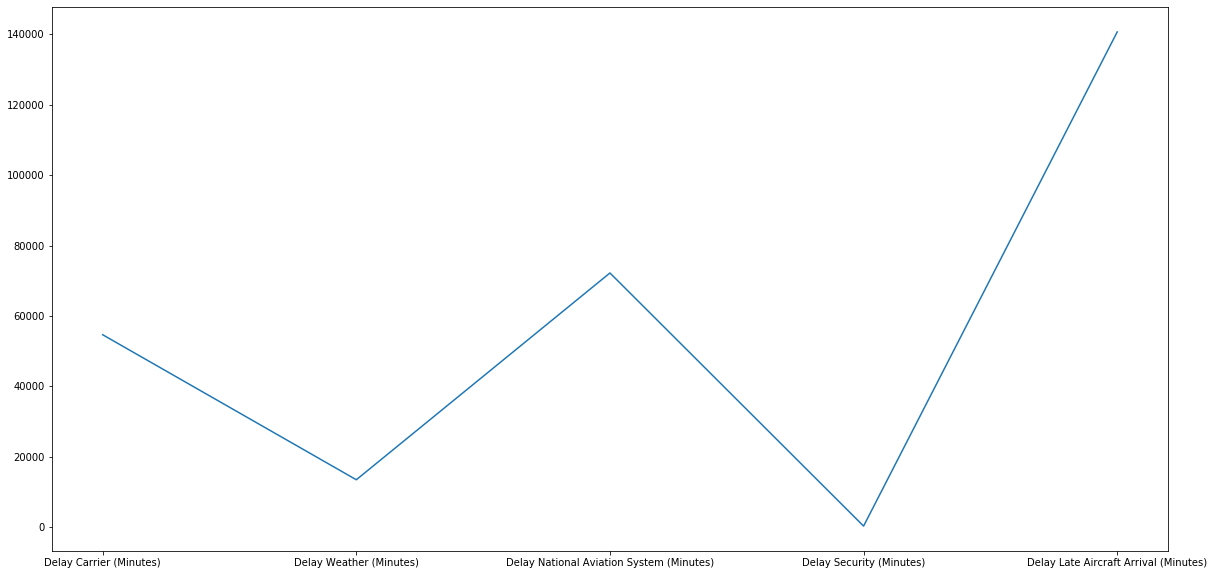

In [16]:
plt.figure(figsize=(20,10))
plt.plot(x_axis,y_axis)

plt.savefig("delay_reason.png")

Is there any relationship between delay carrier and delay weather?

In [17]:
population1 = df1['Departure delay (Minutes)']

In [18]:
population2 = df1['Delay Weather (Minutes)']

In [19]:
df['Delay Weather (Minutes)'].sum()

13493.0

In [20]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=18.99610252180021, pvalue=8.608817966532434e-70)

In [21]:
population3= df1['Delay Carrier (Minutes)']

In [22]:
df1['Delay Carrier (Minutes)'].sum()

54674.0

In [23]:
stats.ttest_ind(population1, population3, equal_var=False)

Ttest_indResult(statistic=14.692010009284934, pvalue=4.466037487937843e-45)

In [24]:
population4= df1['Delay National Aviation System (Minutes)']

In [25]:
df['Delay National Aviation System (Minutes)'].sum()

72213.0

In [26]:
stats.ttest_ind(population1, population4, equal_var=False)

Ttest_indResult(statistic=13.010062859806368, pvalue=2.4489747572877326e-36)

In [27]:
population5= df1['Delay Late Aircraft Arrival (Minutes)']

In [28]:
df1['Delay Late Aircraft Arrival (Minutes)'].sum()

140670.0

In [29]:
stats.ttest_ind(population1, population5, equal_var=False)

Ttest_indResult(statistic=5.9677594097942555, pvalue=2.926767283997928e-09)

In [30]:
df1['Delay Security (Minutes)'].sum()

333.0

In [31]:
stats.f_oneway(population2,population3,population4,population5)

F_onewayResult(statistic=163.49374771823963, pvalue=5.574304295313044e-100)

In [84]:
df.count()

Carrier Code                                20694
Date (MM/DD/YYYY)                           20694
Destination Airport                         20694
Scheduled departure time                    20694
Actual departure time                       20694
Departure delay (Minutes)                   20694
Delay Carrier (Minutes)                     20694
Delay Weather (Minutes)                     20694
Delay National Aviation System (Minutes)    20694
Delay Security (Minutes)                    20694
Delay Late Aircraft Arrival (Minutes)       20694
dtype: int64

In [53]:
df_1 = df[df['Departure delay (Minutes)'] >0]

In [83]:
df_1

,Carrier Code,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
5,AA,01/01/2017,DFW,09:15,10:25,70.0,47.0,0.0,0.0,0.0,0.0
6,AA,01/01/2017,CLT,11:25,12:40,75.0,56.0,0.0,0.0,0.0,0.0
7,AA,01/01/2017,CLT,17:11,17:31,20.0,0.0,0.0,0.0,0.0,0.0
13,AA,01/01/2017,ORD,17:20,17:38,18.0,0.0,0.0,0.0,0.0,0.0
15,AA,01/01/2017,CLT,10:05,10:49,44.0,33.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20662,AA,12/31/2017,PHX,16:20,17:48,88.0,8.0,0.0,0.0,0.0,64.0
20663,AA,12/31/2017,DFW,12:40,12:41,1.0,0.0,0.0,0.0,0.0,0.0
20666,AA,12/31/2017,CLT,17:03,18:16,73.0,0.0,0.0,62.0,0.0,0.0
20681,AA,12/31/2018,DFW,05:01,05:05,4.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_1.count()

Carrier Code                                5924
Date (MM/DD/YYYY)                           5924
Destination Airport                         5924
Scheduled departure time                    5924
Actual departure time                       5924
Departure delay (Minutes)                   5924
Delay Carrier (Minutes)                     5924
Delay Weather (Minutes)                     5924
Delay National Aviation System (Minutes)    5924
Delay Security (Minutes)                    5924
Delay Late Aircraft Arrival (Minutes)       5924
dtype: int64

In [63]:
y=df_1['Departure delay (Minutes)']

In [64]:
x=df_1['Delay Weather (Minutes)']

In [65]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

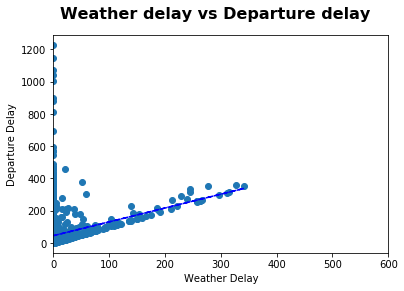

In [66]:
fig, ax = plt.subplots()

fig.suptitle("Weather delay vs Departure delay", fontsize=16, fontweight="bold")
ax.set_xlim(0, 600)

ax.set_xlabel("Weather Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')

plt.show()

In [67]:
stats.ttest_ind(x, y, equal_var=False)

Ttest_indResult(statistic=-46.13945768203582, pvalue=0.0)

In [68]:
x1=df_1['Delay Carrier (Minutes)']

In [69]:
(slope, intercept, _, _, _) = linregress(x1, y)
fit1 = slope * x1 + intercept

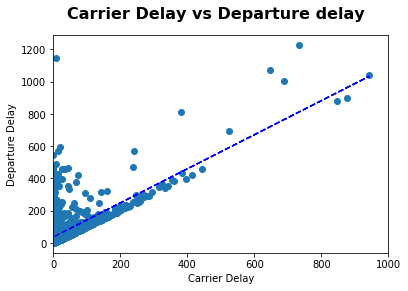

In [70]:
fig, ax = plt.subplots()

fig.suptitle("Carrier Delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1000)

ax.set_xlabel("Carrier Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x1, y, linewidth=0, marker='o')
ax.plot(x1, fit1, 'b--')

plt.show()

In [71]:
stats.ttest_ind(x1, y, equal_var=False)

Ttest_indResult(statistic=-35.55966998155197, pvalue=2.014487685602765e-259)

In [72]:
x2=df_1['Delay National Aviation System (Minutes)']

In [73]:
(slope, intercept, _, _, _) = linregress(x2, y)
fit2 = slope * x2 + intercept

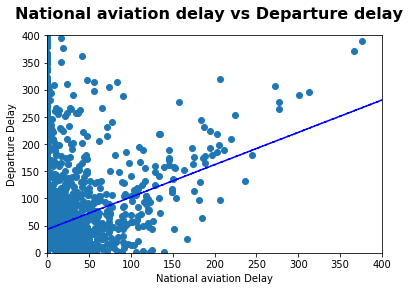

In [74]:
fig, ax = plt.subplots()

fig.suptitle("National aviation delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 400)
ax.set_ylim(0, 400)

ax.set_xlabel("National aviation Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x2, y, linewidth=0, marker='o')
ax.plot(x2, fit2, 'b--')

plt.show()

In [75]:
stats.ttest_ind(x2, y, equal_var=False)

Ttest_indResult(statistic=-39.08892782215759, pvalue=5.418400767040148e-304)

In [76]:
x3=df_1['Delay Late Aircraft Arrival (Minutes)']

In [77]:
(slope, intercept, _, _, _) = linregress(x3, y)
fit3 = slope * x3 + intercept

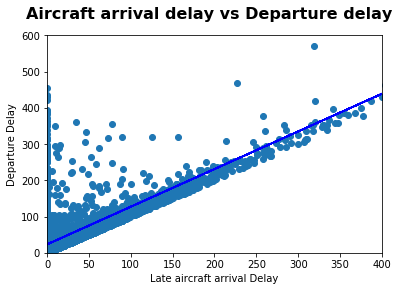

In [78]:
fig, ax = plt.subplots()

fig.suptitle("Aircraft arrival delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 400)
ax.set_ylim(0, 600)

ax.set_xlabel("Late aircraft arrival Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x3, y, linewidth=0, marker='o')
ax.plot(x3, fit3, 'b--')

plt.show()

In [79]:
stats.ttest_ind(x3, y, equal_var=False)

Ttest_indResult(statistic=-20.379154236982604, pvalue=1.2673478775553315e-90)

In [80]:
x4=df_1['Delay Security (Minutes)']

In [81]:
(slope, intercept, _, _, _) = linregress(x4, y)
fit4 = slope * x4 + intercept

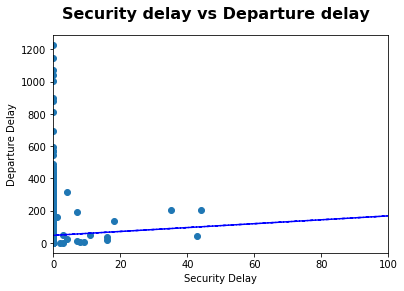

In [82]:
fig, ax = plt.subplots()

fig.suptitle("Security delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 100)

ax.set_xlabel("Security Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x4, y, linewidth=0, marker='o')
ax.plot(x4, fit4, 'b--')

plt.show()